In [6]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import random
import math
from scipy import stats
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('seaborn-darkgrid')

# train =  pd.read_csv('2016.csv', nrows = 50000, delimiter = ',')

#p = 1  # p% of lines
filename = 'flight_data.csv'
#random.seed(234)

# if random from [0,1] > p, skip row
df = pd.read_csv(filename)

C:\Users\abrea\.julia\packages\Conda\hsaaN\deps\usr\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (48,77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()
df.tail()
df.describe()

YEAR       QUARTER         MONTH  DAY_OF_MONTH   DAY_OF_WEEK  \
count  1.129228e+07  1.129228e+07  1.129228e+07  1.129228e+07  1.129228e+07   
mean   2.016503e+03  2.513742e+00  6.541104e+00  1.577031e+01  3.936721e+00   
std    4.999937e-01  1.104763e+00  3.396582e+00  8.782684e+00  1.988655e+00   
min    2.016000e+03  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.016000e+03  2.000000e+00  4.000000e+00  8.000000e+00  2.000000e+00   
50%    2.017000e+03  3.000000e+00  7.000000e+00  1.600000e+01  4.000000e+00   
75%    2.017000e+03  3.000000e+00  9.000000e+00  2.300000e+01  6.000000e+00   
max    2.017000e+03  4.000000e+00  1.200000e+01  3.100000e+01  7.000000e+00   

       OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
count           1.129228e+07       1.129228e+07       1.129228e+07   
mean            1.990057e+04       2.111148e+03       1.269197e+04   
std             3.805478e+02       1.719439e+03       1.534238e+03   
min             1.939300e+04       1.000000e+00       1.013500e+04   
25%             1.979000e+04       7.230000e+02       1.129200e+04   
50%             1.980500e+04       1.663000e+03       1.289200e+04   
75%             2.030400e+04       2.963000e+03       1.405700e+04   
max             2.117100e+04       8.402000e+03       1.621800e+04   

       ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID      ...       \
count           1.129228e+07           1.129228e+07      ...        
mean            1.269200e+06           3.172494e+04      ...        
std             1.534235e+05           1.279577e+03      ...        
min             1.013503e+06           3.007000e+04      ...        
25%             1.129202e+06           3.064700e+04      ...        
50%             1.289203e+06           3.145300e+04      ...        
75%             1.405702e+06           3.246700e+04      ...        
max             1.621801e+06           3.599100e+04      ...        

       DIV4_TAIL_NUM  DIV5_AIRPORT  DIV5_AIRPORT_ID  DIV5_AIRPORT_SEQ_ID  \
count            0.0           0.0              0.0                  0.0   
mean             NaN           NaN              NaN                  NaN   
std              NaN           NaN              NaN                  NaN   
min              NaN           NaN              NaN                  NaN   
25%              NaN           NaN              NaN                  NaN   
50%              NaN           NaN              NaN                  NaN   
75%              NaN           NaN              NaN                  NaN   
max              NaN           NaN              NaN                  NaN   

       DIV5_WHEELS_ON  DIV5_TOTAL_GTIME  DIV5_LONGEST_GTIME  DIV5_WHEELS_OFF  \
count             0.0               0.0                 0.0              0.0   
mean              NaN               NaN                 NaN              NaN   
std               NaN               NaN                 NaN              NaN   
min               NaN               NaN                 NaN              NaN   
25%               NaN               NaN                 NaN              NaN   
50%               NaN               NaN                 NaN              NaN   
75%               NaN               NaN                 NaN              NaN   
max               NaN               NaN                 NaN              NaN   

       DIV5_TAIL_NUM  Unnamed: 109  
count            0.0           0.0  
mean             NaN           NaN  
std              NaN           NaN  
min              NaN           NaN  
25%              NaN           NaN  
50%              NaN           NaN  
75%              NaN           NaN  
max              NaN           NaN  

[8 rows x 90 columns]

In [72]:
df['ARR_DELAY'].describe()

count    1.111756e+07
mean     3.924321e+00
std      4.392369e+01
min     -2.380000e+02
25%     -1.400000e+01
50%     -6.000000e+00
75%      7.000000e+00
max      2.189000e+03
Name: ARR_DELAY, dtype: float64

In [73]:
df['TAIL_NUM'].describe()

count     11266876
unique        5344
top         N492HA
freq          7086
Name: TAIL_NUM, dtype: object

Unique tail numbers / planes from the 56k sample are 4713 (8.4%). Most frequent flied plane within this sample is Hawaiian Airlines plane, which makes sense because a typical flight in Hawaii is < 1 hr.

Text(0,0.5,'Observations')

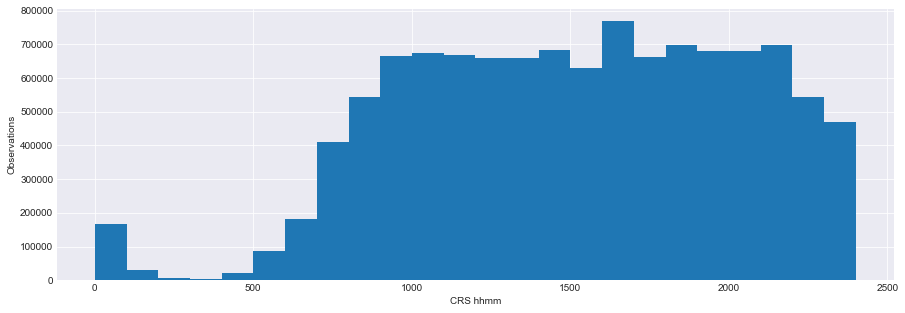

In [71]:
df['CRS_ARR_TIME'].hist(bins = 24, figsize = (15, 5))
plt.xlabel('CRS hhmm')
plt.ylabel('Observations')

In [16]:
print(df.describe().to_string())

          YEAR       QUARTER         MONTH  DAY_OF_MONTH   DAY_OF_WEEK  OP_CARRIER_AIRLINE_ID  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID  ORIGIN_CITY_MARKET_ID  ORIGIN_STATE_FIPS    ORIGIN_WAC  DEST_AIRPORT_ID  DEST_AIRPORT_SEQ_ID  DEST_CITY_MARKET_ID  DEST_STATE_FIPS      DEST_WAC  CRS_DEP_TIME      DEP_TIME     DEP_DELAY  DEP_DELAY_NEW     DEP_DEL15  DEP_DELAY_GROUP      TAXI_OUT    WHEELS_OFF     WHEELS_ON       TAXI_IN  CRS_ARR_TIME      ARR_TIME     ARR_DELAY  ARR_DELAY_NEW     ARR_DEL15  ARR_DELAY_GROUP     CANCELLED     DIVERTED  CRS_ELAPSED_TIME  ACTUAL_ELAPSED_TIME      AIR_TIME  FLIGHTS      DISTANCE  DISTANCE_GROUP  CARRIER_DELAY  WEATHER_DELAY    NAS_DELAY  SECURITY_DELAY  LATE_AIRCRAFT_DELAY  FIRST_DEP_TIME  TOTAL_ADD_GTIME  LONGEST_ADD_GTIME  DIV_AIRPORT_LANDINGS  DIV_REACHED_DEST  DIV_ACTUAL_ELAPSED_TIME  DIV_ARR_DELAY  DIV_DISTANCE  DIV1_AIRPORT_ID  DIV1_AIRPORT_SEQ_ID  DIV1_WHEELS_ON  DIV1_TOTAL_GTIME  DIV1_LONGEST_GTIME  DIV1_WHEELS_OFF  DIV2_AIRPORT

In [70]:
df['SECURITY_DELAY'].describe()

count    1.993712e+06
mean     8.832519e-02
std      2.750647e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      8.270000e+02
Name: SECURITY_DELAY, dtype: float64

In [69]:
df['CARRIER_DELAY'].describe()

count    1.993712e+06
mean     2.008818e+01
std      5.994034e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.800000e+01
max      2.142000e+03
Name: CARRIER_DELAY, dtype: float64

In [68]:
df['WEATHER_DELAY'].describe()

count    1.993712e+06
mean     2.711446e+00
std      2.296430e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.934000e+03
Name: WEATHER_DELAY, dtype: float64

In [37]:
unique_airports = df['ORIGIN'].unique()
len(unique_airports)

325

In [85]:
df['ORIGIN_STATE_ABR']

0           MI
1           GA
2           CA
3           UT
4           MT
5           GA
6           TN
7           GA
8           FL
9           GA
10          MN
11          CA
12          GA
13          PA
14          UT
15          GA
16          NY
17          NY
18          GA
19          FL
20          GA
21          MN
22          VA
23          OH
24          MI
25          TX
26          UT
27          GA
28          TN
29          FL
30          CO
31          GA
32          GA
33          WA
34          FL
35          CT
36          GA
37          WA
38          NY
39          GA
40          NC
41          PA
42          FL
43          GA
44          FL
45          MN
46          CA
47          TX
48          GA
49          KY
50          MN
51          NY
52          GA
53          GA
54          GA
55          VA
56          NV
57          NC
58          KY
59          GA
60          IL
61          LA
62          MI
63          TN
64          CA
65          OH
66        

In [96]:
pd.options.display.max_rows = 345
df_2 = pd.DataFrame()
df_2['airports'] = df['ORIGIN']
df_2['state'] = df['ORIGIN_STATE_NM']
df_2 = df_2.sort_values(by=['state'])
df_2 = df_2.drop_duplicates()
df_2 = df_2.reset_index()
df_2 = df_2.drop(columns=['index'])
df_2

airports                                           state
0        BHM                                         Alabama
1        HSV                                         Alabama
2        MGM                                         Alabama
3        MOB                                         Alabama
4        DHN                                         Alabama
5        ANC                                          Alaska
6        KTN                                          Alaska
7        JNU                                          Alaska
8        BET                                          Alaska
9        SIT                                          Alaska
10       FAI                                          Alaska
11       ADK                                          Alaska
12       ADQ                                          Alaska
13       WRG                                          Alaska
14       YAK                                          Alaska
15       SCC                                          Alaska
16       PSG                                          Alaska
17       BRW                                          Alaska
18       OME                                          Alaska
19       OTZ                                          Alaska
20       CDV                                          Alaska
21       GST                                          Alaska
22       AKN                                          Alaska
23       DLG                                          Alaska
24       TKI                                          Alaska
25       PHX                                         Arizona
26       TUS                                         Arizona
27       YUM                                         Arizona
28       FLG                                         Arizona
29       IFP                                         Arizona
30       LIT                                        Arkansas
31       XNA                                        Arkansas
32       FSM                                        Arkansas
33       TXK                                        Arkansas
34       SFO                                      California
35       LAX                                      California
36       SNA                                      California
37       OAK                                      California
38       SBA                                      California
39       SMF                                      California
40       SAN                                      California
41       BUR                                      California
42       SBP                                      California
43       SJC                                      California
44       ONT                                      California
45       PSP                                      California
46       BFL                                      California
47       MRY                                      California
48       LGB                                      California
49       FAT                                      California
50       RDD                                      California
51       SMX                                      California
52       ACV                                      California
53       STS                                      California
54       MMH                                      California
55       DEN                                        Colorado
56       COS                                        Colorado
57       GJT                                        Colorado
58       HDN                                        Colorado
59       DRO                                        Colorado
60       ASE                                        Colorado
61       EGE                                        Colorado
62       MTJ                                        Colorado
63       GUC                                        Colorado
64       PUB                           